In [2]:
import rdkit
from rdkit.Chem import AllChem as Chem
from rdkit.DataStructs import cDataStructs
import numpy as np
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt

In [3]:
insilico_mols = Chem.SDMolSupplier('../INSCoV-2020.sdf')

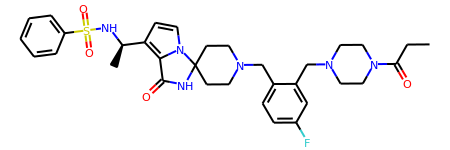

In [4]:
insilico_mols[0]

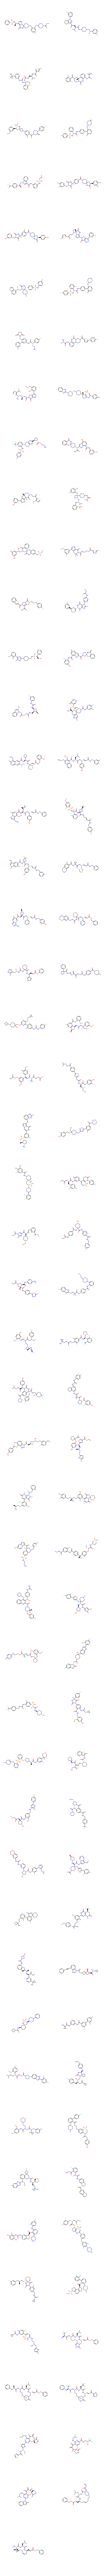

In [5]:
rdkit.Chem.Draw.MolsToGridImage(insilico_mols, molsPerRow=2, maxMols=100, subImgSize=(600, 600))

First impressions: These compounds are not peptidomimetic at all. Much more classical small molecule drugs. Anti-viral drugs tend to be much more peptidomimetic in nature.

In [6]:
n3 = Chem.MolFromSmiles("CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)c1cc(C)on1)C(C)C)C(=O)N[C@@H](C[C@@H]2CCNC2=O)\C=C/C(=O)OCc3ccccc3")

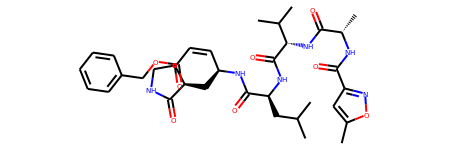

In [7]:
n3

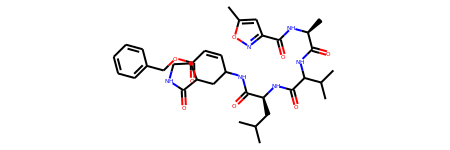

In [8]:
#Write freehand in smiles, same drawing in rdkit. Not a great drawing.
cmp = Chem.MolFromSmiles("Cc1onc(c1)C(=O)N[C@@H](C)C(=O)NC(C(C)C)C(=O)N[C@@H](CC(C)C)C(=O)NC(CC1CCNC1(=O))\C=C/C(=O)OCc1ccccc1")
cmp

In [9]:
Chem.MolToSmiles(cmp)

'Cc1cc(C(=O)N[C@@H](C)C(=O)NC(C(=O)N[C@@H](CC(C)C)C(=O)NC(/C=C\\C(=O)OCc2ccccc2)CC2CCNC2=O)C(C)C)no1'

In [10]:
n3_trans = Chem.MolFromSmiles("CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)c1cc(C)on1)C(C)C)C(=O)N[C@@H](C[C@@H]2CCNC2=O)\C=C\C(=O)OCc3ccccc3")

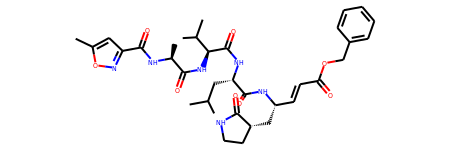

In [11]:
n3_trans

In [12]:
n3_canonical_smiles = Chem.MolToSmiles(n3)

In [13]:
#Canonical smiles is completely different than the smiles structure I had.
n3_canonical_smiles

'Cc1cc(C(=O)N[C@@H](C)C(=O)N[C@H](C(=O)N[C@@H](CC(C)C)C(=O)N[C@H](/C=C\\C(=O)OCc2ccccc2)C[C@@H]2CCNC2=O)C(C)C)no1'

In [14]:
n3_fp = Chem.GetMorganFingerprintAsBitVect(n3,2)
cmp_fp = Chem.GetMorganFingerprintAsBitVect(cmp,2)

In [15]:
n3_fp

In [16]:
rdkit.DataStructs.TanimotoSimilarity(n3_fp, cmp_fp)

1.0

In [17]:
fps = [Chem.GetMorganFingerprintAsBitVect(x,2) for x in insilico_mols]

In [18]:
similarities = [rdkit.DataStructs.TanimotoSimilarity(n3_fp, x) for x in fps]

Wow! Completely dissimilar Molecules! 

In [19]:
similarities = [rdkit.DataStructs.DiceSimilarity(n3_fp, x) for x in fps]

Dice Simialarities still vastly different. It makes sense since their models would be trained on small molecule databases. A peptidomimetic drugs is by no means REQUIRED but 

Searched for n3 structure on pubchem, returned 188 similar structures. wasn't on chembl either. searched both the given structure and came back with nothing.

In [20]:
similar_df = pd.read_csv('../PubChem_compound_smiles_similarity.csv', engine='python', delimiter=',')

In [21]:
cids = similar_df[['cid']].values.squeeze()

The pubchem download doesn't have the compounds, shockingly. Have ot get the cid's and download them separately

In [22]:
import os
with open('../similar_to_n3_pubchem.txt', 'w') as f:
    for c in cids:
        f.write(str(c)+"\n")

In [23]:
pubchem_mols = Chem.SDMolSupplier('../pubchem_similar_to_n3.sdf')
for i in range(188):
    try:
        rdkit.Chem.Draw.MolToImage(pubchem_mols[i])
    except:
        print("didn't work on one" , i)

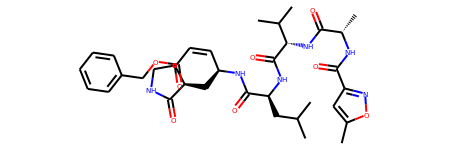

In [24]:
n3

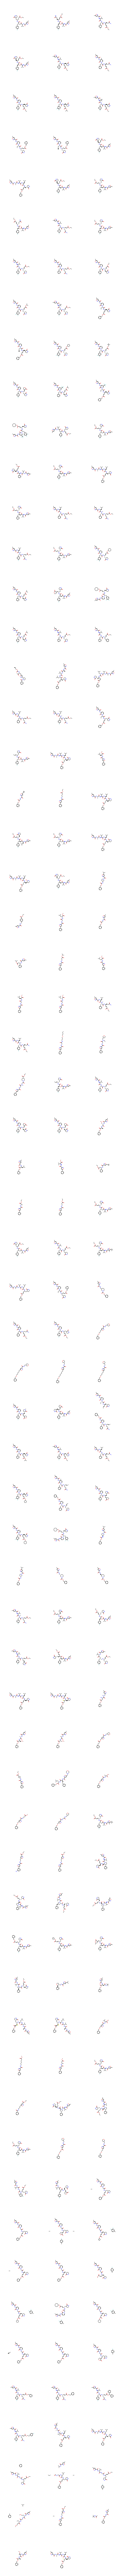

In [25]:
rdkit.Chem.Draw.MolsToGridImage(pubchem_mols, molsPerRow=3, maxMols=188, subImgSize=(450, 450))